In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
885,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
886,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,45.0,1,2,W./C. 6607,23.4500,NaN,S
887,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.5+ KB


In [4]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()

In [5]:
df["Sex"] = lb.fit_transform(df.Sex)
df_test["Sex"] = lb.fit_transform(df_test.Sex)

In [6]:
features = ["Age", "Sex", "Fare"]
X = df[features]
y = df["Survived"]

In [7]:
X

,Age,Sex,Fare
0,22.0,1,7.2500
1,38.0,0,71.2833
2,26.0,0,7.9250
3,35.0,0,53.1000
4,35.0,1,8.0500
...,...,...,...
884,27.0,1,13.0000
885,19.0,0,30.0000
886,45.0,0,23.4500
887,26.0,1,30.0000


In [11]:
model = DecisionTreeClassifier(max_depth=6, max_leaf_nodes = 8)
model.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=8,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [12]:
from sklearn import tree

In [13]:
with open("Dtree.dot", 'w') as f:
    f = tree.export_graphviz(model,feature_names = features, out_file=f);

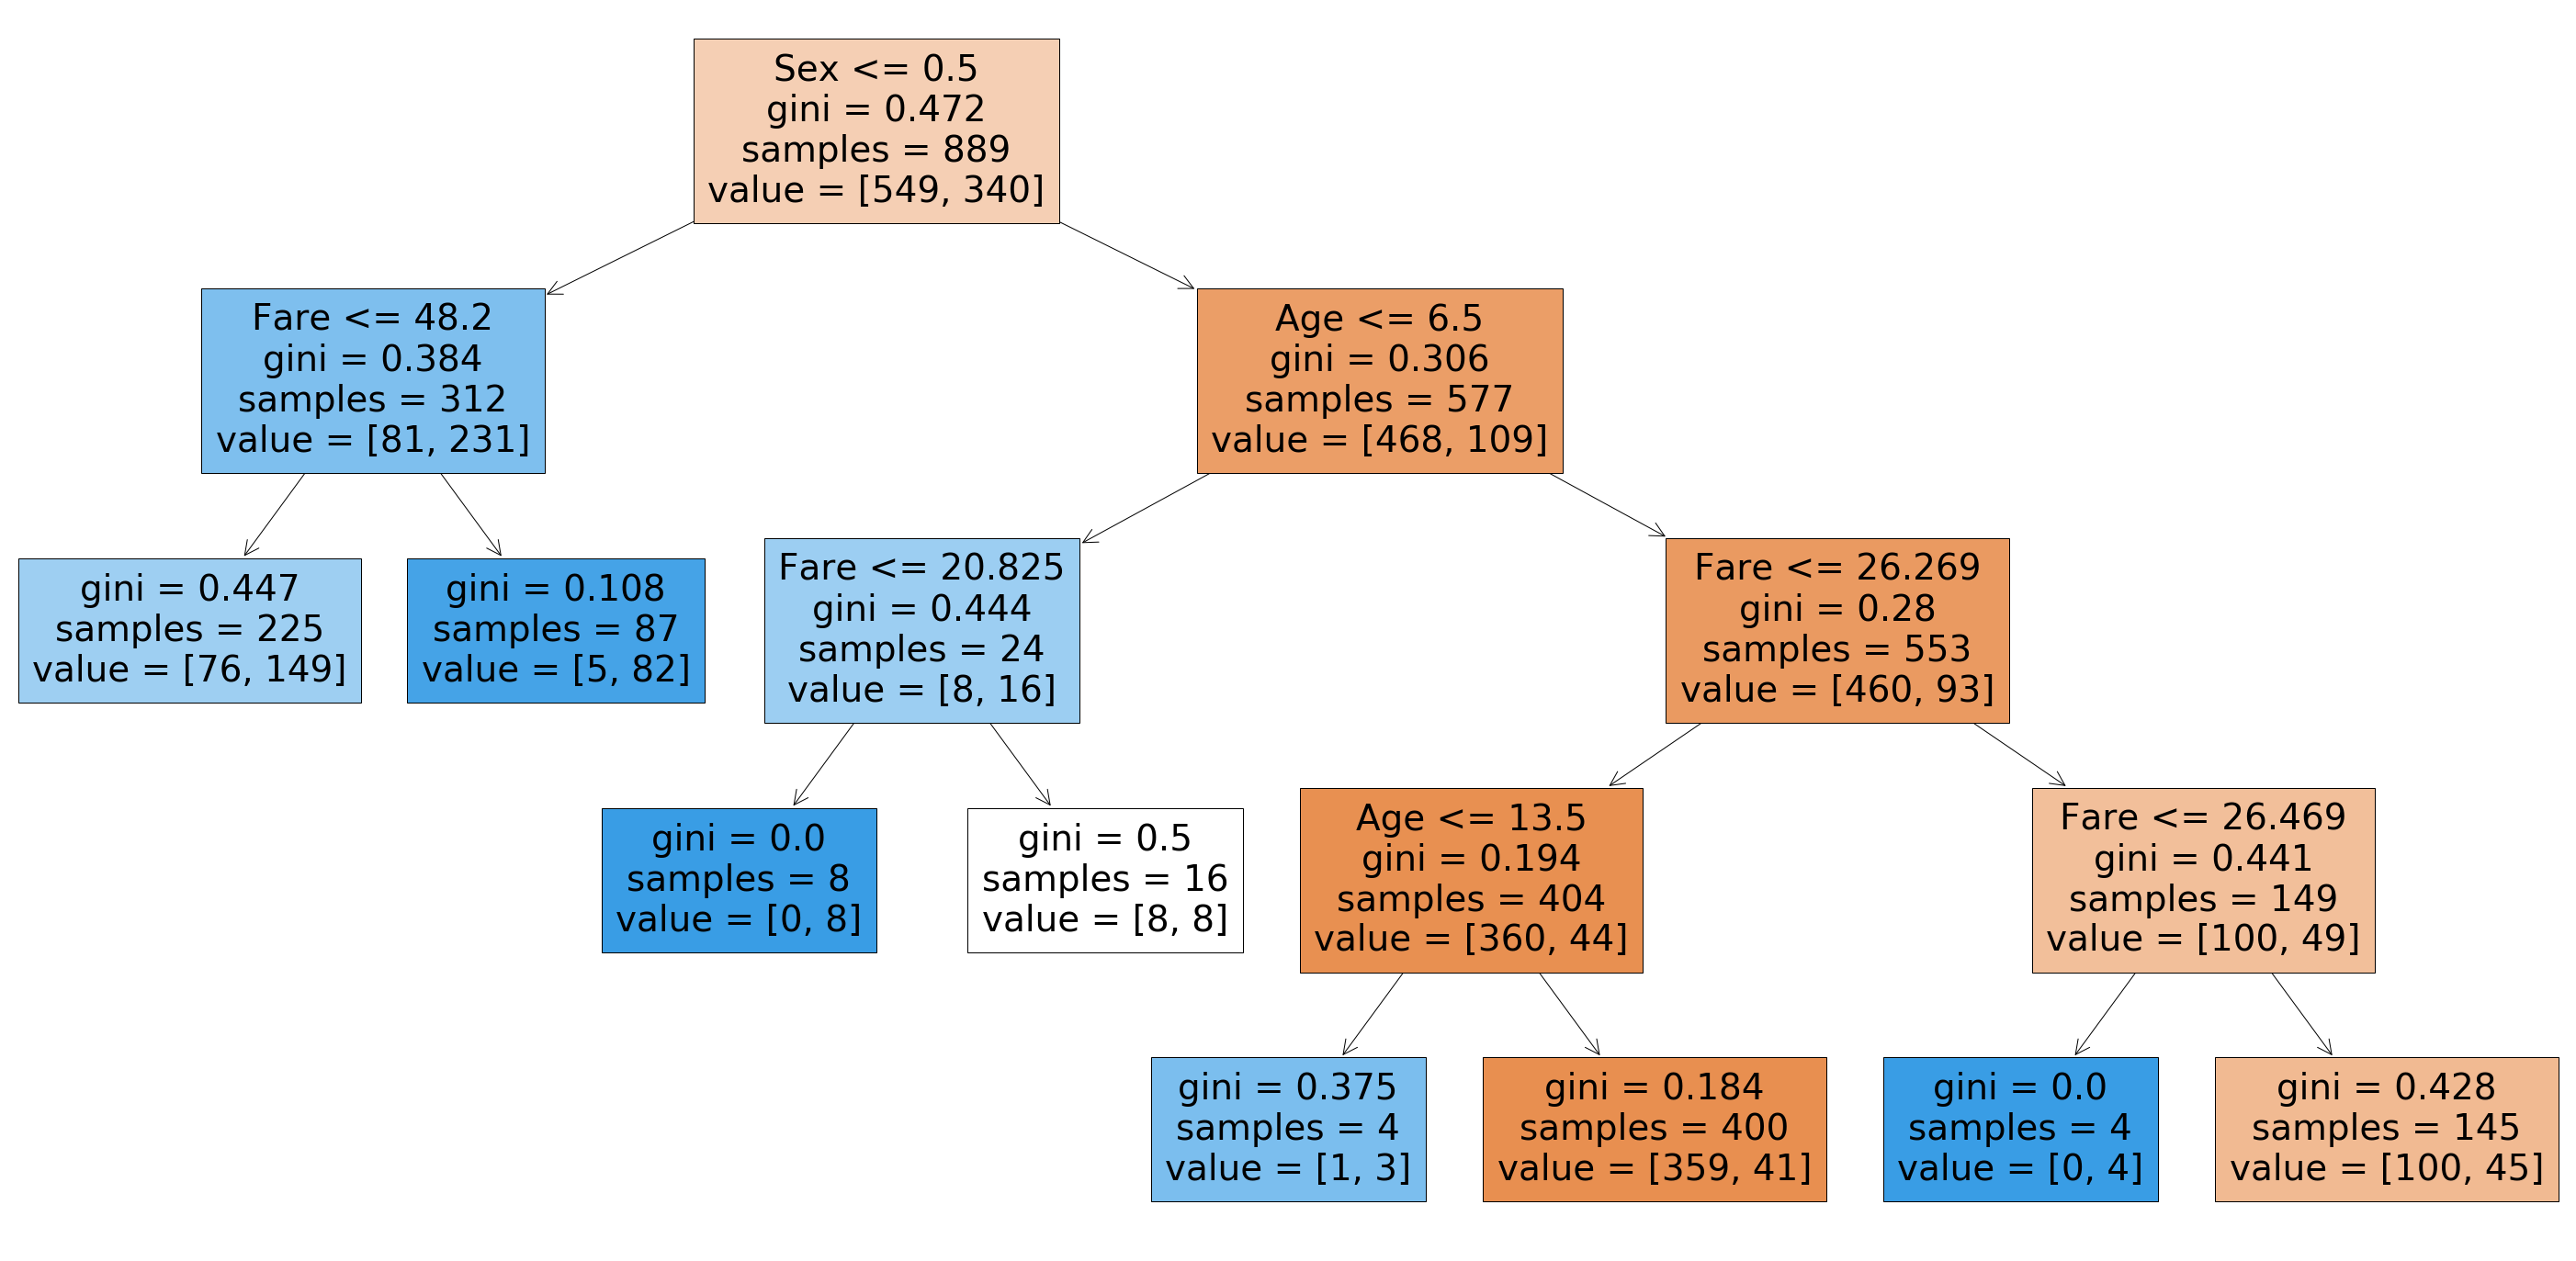

In [14]:
fig = plt.figure(figsize = (50, 25))
_=tree.plot_tree(model, feature_names = features, filled=True)

# The decision tree model makes the following rules:    

<ul>
    <li>A female who's fare was less than or equal to 48.2 was somewhat likely to survive</li>
    <li>A female who's fare was greater than 48.2 was most likely to survive</li>
    <li>A male who's age is less than or equal to 6.5 and who's fare was less than or equal to 20.825 survived</li>
    <li>A male who's age is from 6.5 to 13.5 and who's fare was less than or equal to 26.269 is quite likely to survive</li>
    <li>A male who's age is greater than 13.5 and who's fare was less than or equal to 26.269 is least likely to survive</li>
    <li>A male who's age is greater than 6.5 and who's fare was less than or equal to 26.469 survived</li>
    <li>A male who's age is greater than 6.5 and who's fare was greater than 26.469 is somewhat least likely to survive</li>
</ul>

In [15]:
accuracy = model.score(X, y)
print("Accuracy:", accuracy*100)

Accuracy: 80.20247469066368


In [16]:
X_test = df_test[features]

In [17]:
df_test["Predictions"] = model.predict(X_test)

In [18]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Predictions
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,S,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,Q,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,S,1
...,...,...,...,...,...,...,...,...,...,...,...
412,1305,3,"Spector, Mr. Woolf",1,45.0,0,0,A.5. 3236,8.0500,S,0
413,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C,1
414,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,0
415,1308,3,"Ware, Mr. Frederick",1,45.0,0,0,359309,8.0500,S,0
